In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import os
import cv2

In [47]:
datapath = 'dataset'
categories = os.listdir(datapath)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))

In [48]:
img_size=100
data=[]
target=[]
for category in categories:
    folder_path = os.path.join(datapath,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img,(img_size,img_size))
            data.append(resized_img)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [49]:
data = np.array(data)/255.0
data = np.reshape(data, (len(data), 100, 100, 1))
target = np.array(target)

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2,random_state=42,shuffle=True)

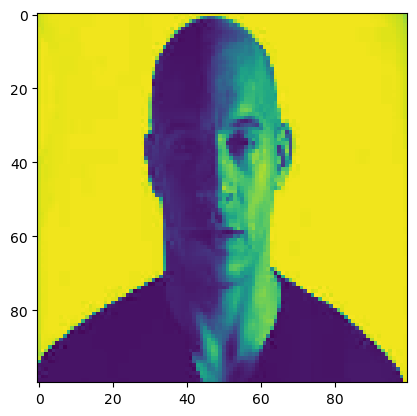

In [51]:
n=random.randint(0,len(X_train))
plt.imshow(X_train[n,:])
plt.show()

In [67]:
model = Sequential()
model.add(Conv2D(input_shape=(100,100,1),filters=8,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=100, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=100, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=100, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=8,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [68]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(X_train,Y_train,epochs=15,validation_data=(X_test,Y_test))

Train on 1100 samples, validate on 276 samples
Epoch 1/15
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.6907 - acc: 0.4982 - val_loss: 0.6078 - val_acc: 0.5000
Epoch 2/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.5210 - acc: 0.7955 - val_loss: 0.3657 - val_acc: 0.8913
Epoch 3/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.3564 - acc: 0.8936 - val_loss: 0.3001 - val_acc: 0.8841
Epoch 4/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.2675 - acc: 0.9227 - val_loss: 0.3696 - val_acc: 0.9275
Epoch 5/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.2212 - acc: 0.9373 - val_loss: 0.2085 - val_acc: 0.9420
Epoch 6/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.1401 - acc: 0.9618 - val_loss: 0.0787 - val_acc: 0.9783
Epoch 7/15
1100/1100 [==============================] - 2s 2ms/sample - loss: 0.0777 - acc: 0.9764 - val_loss: 0.0365 - val_acc: 0.9891
E

In [70]:
model.evaluate(X_test,Y_test)

[0.03284107097357079, 0.98913044]

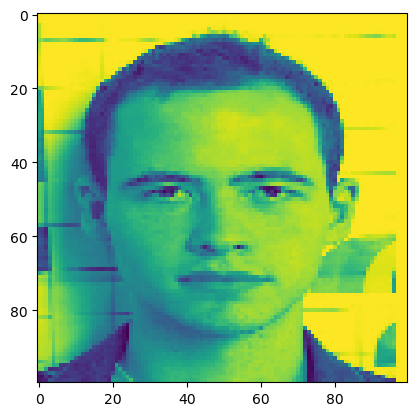

This is image has no mask


In [87]:
inx = random.randint(0,len(X_test))
plt.imshow(X_test[inx,:])
plt.show()
y_pred = model.predict(X_test[inx,:].reshape(1,100,100,1))
if y_pred[0][1]<0.5:
    print("This is image has mask")
else:
    print("This is image has no mask")